<a href="https://colab.research.google.com/github/BibekUpadhyaya/Crop_recommendation/blob/main/crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Motivation 💪
The agricultural sector is under increasing pressure to produce more food for the world's ever-increasing population. Meanwhile, profit margins are being squeezed, weather volatility is affecting production, and farming practises are being scrutinised to align with sustainable resource use, both on-farm and in business operations. Because of these factors, it has never been more important for producers to focus on both efficiency and productivity in order to drive business growth.

Precision agriculture and the rise of agrotech solutions have transformed the industry's ability to optimize resource use for maximum yield. Pierre Robert is frequently considered the father of precision agriculture because of his active promotion of the idea and the organization of the first workshop,'Soil Specific Crop Management' in the early 1990s. It is a modern farming technique based on information and technology that uses data of different charecteristics and based on that suggest farmers to most optimal crops to grow that maintain profitability, efficiency, and sustainability while also protect the environment.

In order to ease the agrarian crisis in the current state of affairs, stronger recommendation systems are required to assist farmers in making informed decisions prior to beginning crop cultivation.

Objective 🎯
Our objective is to build a recommendation system to recommend optimal crops for farmers to cultivate based on a variety of parameters and to assist them in making an informed decision prior to cultivation.

# Contents 📜
* Preparation
    * Load required modules
    * Data description
    * Data loading
    * Data overview
    * Missing values
* Principal Component Analysis
* Visualizations (Before PCA vs After PCA)
* Feature Selection




## Load required modules 🔽
For now, we'll import the numpy, pandas, matplotlib, seaborn and we'll import the other packages later if necessary.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data description 📄

This [dataset](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset) was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

### Data fields

* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm



## Data Loading 📂
We'll use pd.read_csv() function from pandas package to load the data as a dataframe. We'll also use DataFrame.head() and DataFrame.tail() functions to check first and last rows to ensure the formatting is proper for advanced steps.

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')
df1 = df.copy()

In [7]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [8]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


## Data Overview 📎

Let's look at the dimension of the data, column data types, missing values and target labels.


In [9]:
df.shape

(2200, 8)

So, we have here 2200 rows or samples and 8 columns (7 features and 1 target variable)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
np.size(df['label'].unique())

22

We have here data on 22 crops. It is required to check how many samples we have for each crop?

In [12]:
df['label'].value_counts()

cotton         100
rice           100
kidneybeans    100
blackgram      100
watermelon     100
muskmelon      100
orange         100
jute           100
mothbeans      100
lentil         100
coconut        100
pigeonpeas     100
mungbean       100
grapes         100
mango          100
chickpea       100
banana         100
maize          100
pomegranate    100
apple          100
coffee         100
papaya         100
Name: label, dtype: int64

Therefore, for each crop we have 100 samples. i.e. our data is "Balanced"


## Missing values 🔎

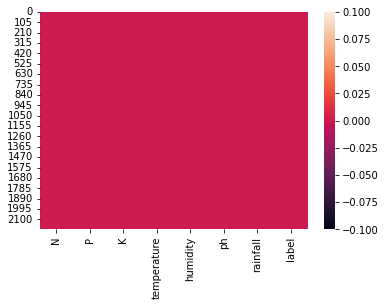

In [13]:
sns.heatmap(df.isna())

We haven't any NA values in the data. So the data cleaning is not required

# Forward feature selection

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
target = df1.label
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [16]:
type(target)

pandas.core.series.Series

In [17]:
df2 = df.copy()
df2.drop('label', axis = 1, inplace = True)

In [18]:
x_train, x_cv, y_train, y_cv = train_test_split(df2, target, test_size=0.2, stratify=target)

In [19]:
def evaluate_metric(model, x_cv, y_cv):
    return accuracy_score(y_cv, model.predict(x_cv))

In [20]:
def forward_feature_selection(x_train, x_cv, y_train, y_cv, n):
    feature_set = []
    for num_features in range(n):
        metric_list = [] 
        model = DecisionTreeClassifier() 
        for feature in x_train.columns:
            if feature not in feature_set:
                f_set = feature_set.copy()
                f_set.append(feature)
                model.fit(x_train[f_set], y_train)
                metric_list.append((evaluate_metric(model, x_cv[f_set], y_cv), feature))

        metric_list.sort(key=lambda x : x[0], reverse = True) 
        feature_set.append(metric_list[0][1])
    return feature_set

In [21]:
f=forward_feature_selection(x_train, x_cv, y_train, y_cv, 6)

In [22]:
f

['rainfall', 'humidity', 'K', 'ph', 'N', 'P']

We have implemented here the forward feature selection method. Now we're getting K, humidity, rainfall, N in our final feature set.



Let us now proceed for Feature Selection using Correlation

In [25]:
a=df.drop('label',axis=1).values
b=df['label'].values

In [26]:
X=pd.DataFrame(a,columns=['N','P','K','temperature','humidity','ph','rainfall'])
X

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [27]:
Y=pd.DataFrame(b,columns=['labels'])
Y

,labels
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [28]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(
     X,
     Y,
     test_size=0.2,
     random_state=0)

X_train.shape,X_test.shape

((1760, 7), (440, 7))

<function matplotlib.pyplot.show>

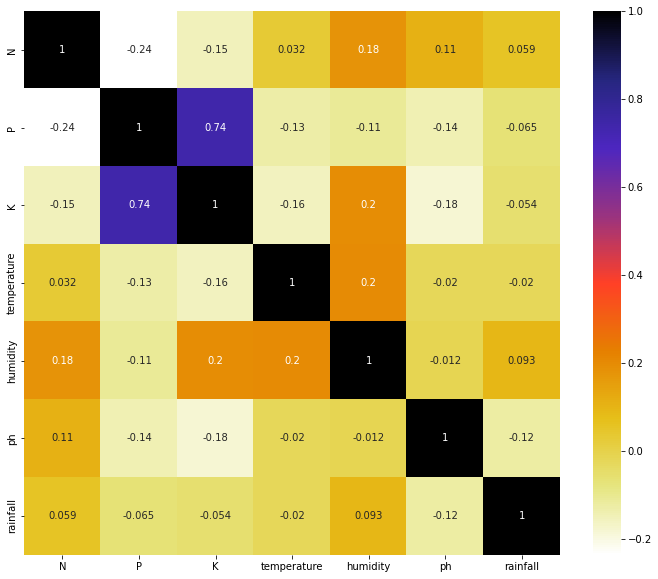

In [29]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show

In [30]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset,threshold): 
    col_corr=set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold: #we are interested in absolute coeff values
                colname= corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr         

In [31]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

1

In [32]:
corr_features

{'K'}

In [33]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,N,P,temperature,humidity,ph,rainfall
1320,105.0,14.0,26.214884,87.688398,6.419052,59.655908
1367,91.0,12.0,24.644585,85.499382,6.343943,48.312190
1291,14.0,121.0,9.724458,83.747656,6.158689,74.464111
264,52.0,73.0,17.257695,18.749440,7.840339,94.002872
728,32.0,66.0,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...
446,32.0,70.0,20.893427,46.248565,6.208843,195.569787
1005,93.0,94.0,25.866324,84.423793,6.079179,114.535750
1919,117.0,56.0,25.992374,77.054355,7.368258,89.118821
708,27.0,64.0,32.842130,68.684015,7.543804,73.671662


We saw that Potassium and Phosphorus has a strong correlation between them

## Model Building

We'll use Decision tree, SVM, kNN, Naive bayes classifiers.

In [35]:
model_list = []
acc_list = []

### Decision tree

In [36]:
from sklearn.metrics import classification_report

In [37]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=42)

In [38]:
clf = DecisionTree.fit(x_train, y_train)
pred_dec = DecisionTree.predict(x_cv)
acc_dec = accuracy_score(y_cv, pred_dec)
acc_list.append(acc_dec)
model_list.append('DecisionTree')
print('DecisionTree accuracy is :', acc_dec * 100)
print(classification_report(y_cv, pred_dec))

DecisionTree accuracy is : 98.63636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       0.95      1.00      0.98        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.90      0.92        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      1.00      0.98        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      0.90      0.92        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00   

### NB

In [43]:
from sklearn.naive_bayes import GaussianNB 

In [44]:
NB = GaussianNB()

In [49]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
265,29,75,75,19.624163,18.714832,7.064790,88.458569
1561,40,136,202,22.852674,94.576458,5.935336,117.531403
772,21,80,20,28.206673,68.270852,7.350870,64.328871
1273,35,135,199,21.774667,80.549426,6.400720,69.396304
985,39,25,36,18.902230,94.998975,5.567805,107.610321
...,...,...,...,...,...,...,...
121,99,50,15,18.147101,71.094453,5.573286,88.077537
1614,24,18,6,26.566083,94.452397,6.285313,116.379652
1147,7,17,26,34.892267,48.756134,6.414527,91.630745
1179,0,17,30,35.474783,47.972305,6.279134,97.790725


In [45]:
clf2 = NB.fit(x_train, y_train)
pred_nb = NB.predict(x_cv)
acc_nb = accuracy_score(y_cv, pred_nb)
acc_list.append(acc_nb)
model_list.append('NB')
print('NB accuracy is :', acc_nb * 100)
print(classification_report(y_cv, pred_nb))

NB accuracy is : 99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.90      0.95      0.93        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00   

In [46]:
labels = df.label.sort_values().unique()

In [47]:
predict_df = pd.DataFrame(clf2.predict_proba([[ 55, 77, 22, 30, 90, 7, 36]]), columns=labels)
predict_df

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,maize,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0.0,2.927117e-30,4.377871e-24,0.0,4.405723e-19,5.031706e-21,1.657124e-16,0.0,8.963659e-30,1.518209e-228,3.284065e-13,7.082638e-08,3.103134e-127,0.000001,0.999941,4.983316e-35,1.411947e-47,1.592465e-16,0.000058,2.458115e-157,4.510639e-23,1.706482e-36


### kNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
kNN =  KNeighborsClassifier(n_neighbors=10, metric='minkowski')

In [53]:
kNN.fit(x_train, y_train)
pred_knn = kNN.predict(x_cv)
acc_knn = accuracy_score(y_cv, pred_knn)
acc_list.append(acc_knn)
model_list.append('kNN')
print('kNN accuracy is :', acc_knn * 100)
print(classification_report(y_cv, pred_knn))

kNN accuracy is : 97.04545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.83      1.00      0.91        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.82      0.90      0.86        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.91      1.00      0.95        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.80      0.89        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00  

### Accuracy comparison plot

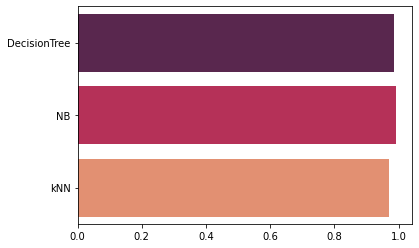

In [54]:
sns.barplot(x = acc_list, y = model_list, palette='rocket')